# Fit an existing model

## Select model

Let's play with some scientific useful model. First we import scientific solvers:

In [1]:
from scifit.solvers.scientific import *

And we select some model of interest such as the Hill model which says something like:

$$y = \frac{k \cdot x^n}{1 + k \cdot x^n}$$



In [2]:
solver = HillEquationFitSolver()

## Load data

Now we generate some synthetic dataset for a given problem:

In [3]:
X = solver.feature_dataset(xmin=0.0, xmax=5.0, dimension=1, resolution=50)

In [4]:
p = [3.75, 0.21]

In [5]:
t = solver.target_dataset(X, *p, sigma=0.1, scale_mode="auto", seed=1234, full_output=True)

In [6]:
y = t["ydata"]
s = t["sigmas"]

## Solve Fit

Everything is setup, we can solve our problem:

In [7]:
solution = solver.fit(X, y, sigma=s)

In [8]:
solver.solved()

True

In [9]:
print(solution["message"])

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


In [10]:
print(solution["parameters"])

[3.87767573 0.19793709]


In [11]:
print(solution["covariance"])

[[ 0.04232867 -0.00421464]
 [-0.00421464  0.00056318]]


## Render solution

Finally we can render fit and loss function to check the dynamic:

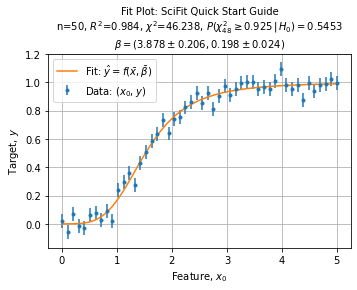

In [12]:
axe = solver.plot_fit(title="SciFit Quick Start Guide")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


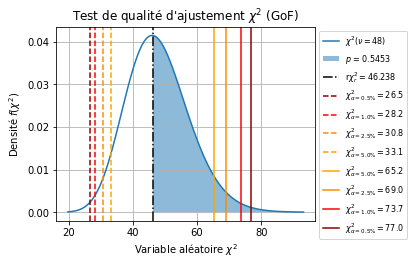

In [13]:
axe = solver.plot_chi_square(title="SciFit Quick Start Guide")
axe.set_title(r"Test de qualité d'ajustement $\chi^2$ (GoF)")
axe.set_xlabel(r"Variable aléatoire $\chi^2$")
axe.set_ylabel(r"Densité $f(\chi^2)$")
axe.figure.savefig("figures/chi2test.eps")

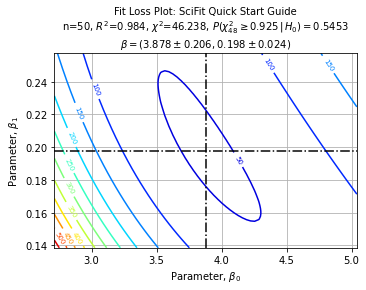

In [14]:
axe = solver.plot_loss(title="SciFit Quick Start Guide")